In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from get_decision_variable_map import get_decision_variable_map
from get_case_outputs_all_models import get_case_outputs_all_models
from get_unique_resources_data import get_unique_resources_data
from get_printable_resource_names import get_printable_resource_names
import h5py

In [28]:
import os

current_dir = os.getcwd()
print(current_dir)

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\figures


In [29]:
plots_path = os.path.join(current_dir, 'plots') + "/"
pdf_path = os.path.join(current_dir, 'pdf_tables') + "/"
latex_path = os.path.join(current_dir, 'latex') + "/"
csv_path = os.path.join(current_dir, 'csv') + "/"
jpg_path = os.path.join(current_dir, 'jpg') + "/"

In [30]:
lookahead_avg_prices_path = os.path.join(jpg_path, 'lookahead_avg_prices') + "/"
if not os.path.exists(lookahead_avg_prices_path):
    os.makedirs(lookahead_avg_prices_path)

In [31]:
# modeling scaling ModelScalingFactor
ModelScalingFactor = 1000

cem_path = os.path.join(os.path.dirname(current_dir), 'GenX.jl', 'research_systems')
policies_path = os.path.join(os.path.dirname(current_dir), 'SPCM', 'research_systems')

date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [32]:
case_names = [    
              "Thermal_Base",
              "2_Hr_BESS", 
              "2_Hr_BESS_Fuelx2",
              "4_Hr_BESS",
              "4_Hr_BESS_Fuelx2",
              "4_Hr_BESS_Fuelx3",
              "4_Hr_BESS_Fuelx4",
              "6_Hr_BESS",
              "6_Hr_BESS_Fuelx2",
              "8_Hr_BESS",
              "8_Hr_BESS_Fuelx2",
              "10_Hr_BESS",
              "10_Hr_BESS_Fuelx2",
              ]

policy_types = [
                'pf',
                'dlac-p',
                'dlac-i',
                'slac',
]

# Create a DataFrame with decision_variable_names as the index
decision_variable_map = get_decision_variable_map()

In [33]:
unique_resources, cases_resources_capacities = get_unique_resources_data(case_names, policies_path)


adding resource: NG 2-on-1 Combined Cycle (F-Frame) from case: Thermal_Base
adding resource: NG Combustion Turbine (F-Frame) from case: Thermal_Base
adding resource: Land-Based Wind - Class 1 - Technology 1 from case: Thermal_Base
adding resource: Utility PV - Class 1 from case: Thermal_Base
adding resource: Utility-Scale Battery Storage - 2Hr from case: 2_Hr_BESS
adding resource: Utility-Scale Battery Storage - 4Hr from case: 4_Hr_BESS
adding resource: Utility-Scale Battery Storage - 6Hr from case: 6_Hr_BESS
adding resource: Utility-Scale Battery Storage - 8Hr from case: 8_Hr_BESS
adding resource: Utility-Scale Battery Storage - 10Hr from case: 10_Hr_BESS


In [34]:
print_unique_resources = get_printable_resource_names(unique_resources)

In [35]:
print_unique_resources

['NG CC', 'NG CT', 'Wind', 'Solar', 'BESS']

In [36]:
### preliminary data processing
# create a dictionary mapping the index to DateTime 
start_date = datetime.datetime(2018, 1, 1)
index_to_datetime = {i-1: start_date + datetime.timedelta(hours=i-1) for i in range(1, 8687)}

# create a list of all indices at datetimes that are 12:00
indices_at_noon = [index for index, dt in index_to_datetime.items() if dt.hour == 12]


### create a dataframe of indices of the prices_scen_array corresponding to day-ahead prices
# or create an array
DA_ranges_array = [range(24 - i % 24, 48 - i % 24) for i in range(8686)] # not +1 because it is python index
AD_ranges_array = [range(0 + i % 24, 24) for i in range(8686)] # not +1 because it is python index

In [42]:
# ceate a dataframe with rows as cases and columns as policies
cases_policies_df = pd.DataFrame(index=case_names, columns=[p for p in policy_types if p != 'pf'])

In [43]:
cases_policies_df

,dlac-p,dlac-i,slac
Thermal_Base,NaN,NaN,NaN
2_Hr_BESS,NaN,NaN,NaN
2_Hr_BESS_Fuelx2,NaN,NaN,NaN
4_Hr_BESS,NaN,NaN,NaN
4_Hr_BESS_Fuelx2,NaN,NaN,NaN
4_Hr_BESS_Fuelx3,NaN,NaN,NaN
4_Hr_BESS_Fuelx4,NaN,NaN,NaN
6_Hr_BESS,NaN,NaN,NaN
6_Hr_BESS_Fuelx2,NaN,NaN,NaN
8_Hr_BESS,NaN,NaN,NaN


Case Name: Thermal_Base

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\Thermal_Base\results_dlac-p\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\Thermal_Base\results_dlac-i\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\Thermal_Base\results_slac\prices_scen_array.h5
Case Name: 2_Hr_BESS

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\2_Hr_BESS\results_dlac-p\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\2_Hr_BESS\results_dlac-i\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\2_Hr_BESS\results_slac\prices_scen_array.h5
Case Name: 2_Hr_BESS_Fuelx2

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\2_Hr_BESS_Fuelx2\res

C:\Users\ks885\AppData\Local\Temp\ipykernel_3188\2796799642.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


Case Name: 6_Hr_BESS

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\6_Hr_BESS\results_dlac-p\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\6_Hr_BESS\results_dlac-i\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\6_Hr_BESS\results_slac\prices_scen_array.h5
Case Name: 6_Hr_BESS_Fuelx2

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\6_Hr_BESS_Fuelx2\results_dlac-p\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\6_Hr_BESS_Fuelx2\results_dlac-i\prices_scen_array.h5
c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\6_Hr_BESS_Fuelx2\results_slac\prices_scen_array.h5
Case Name: 8_Hr_BESS

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\8_Hr_BESS\r

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\SPCM\research_systems\8_Hr_BESS\results_slac\prices_scen_array.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

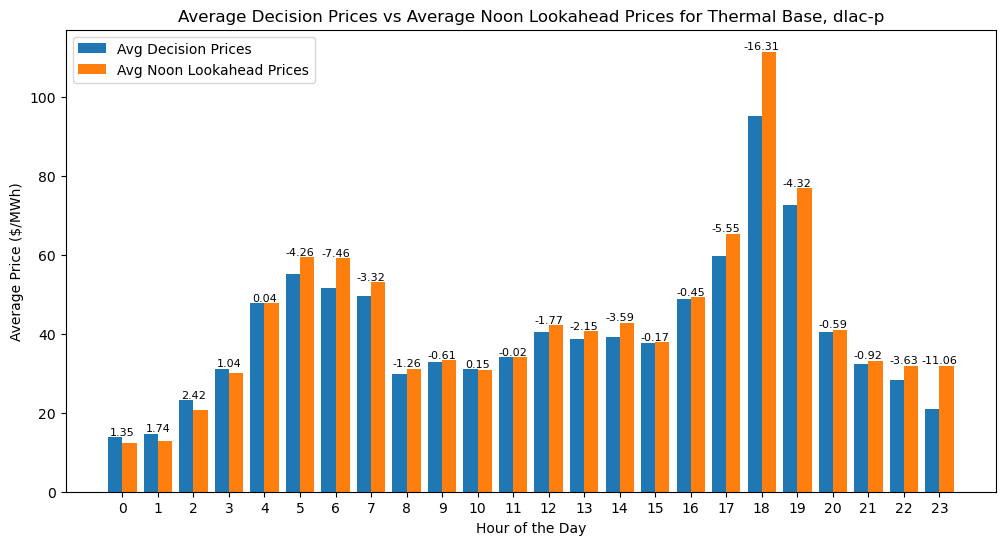

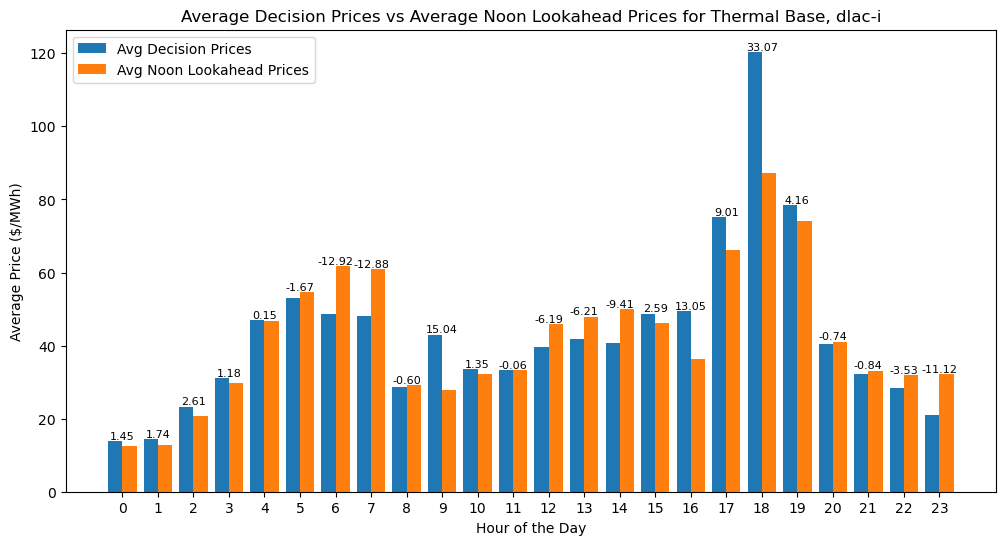

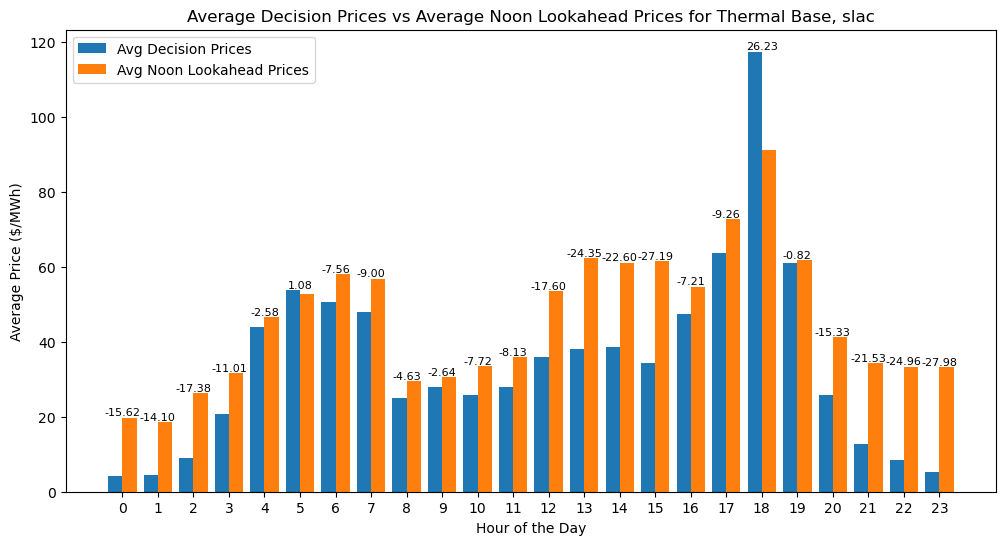

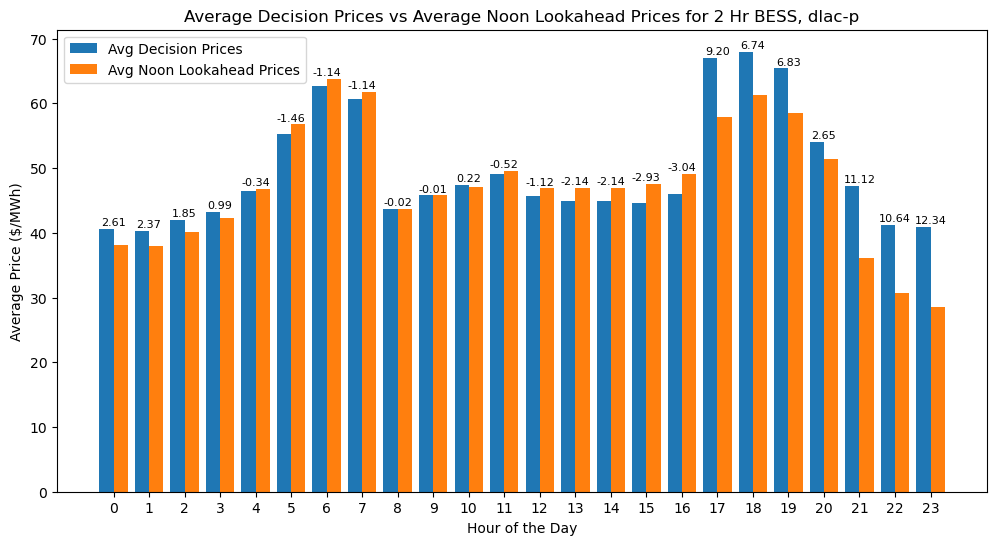

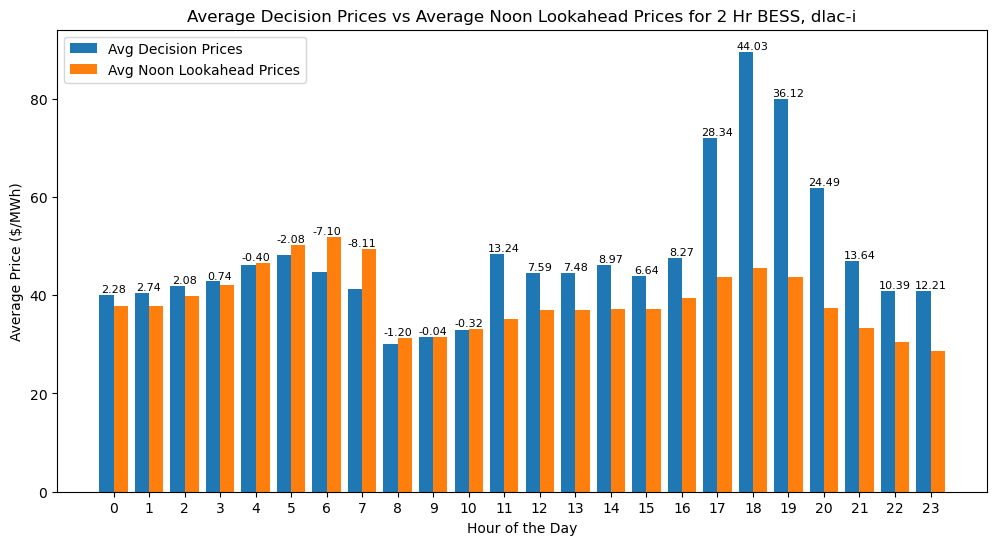

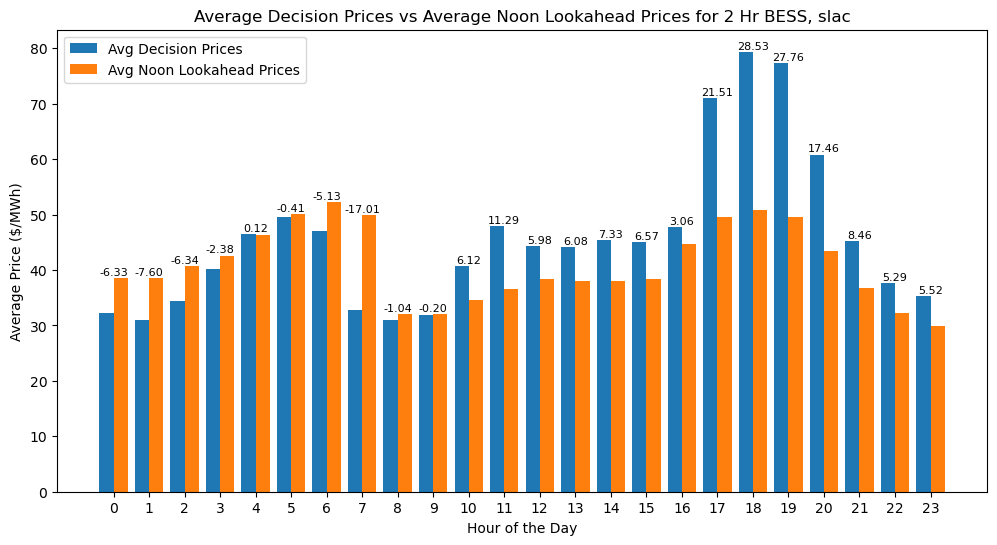

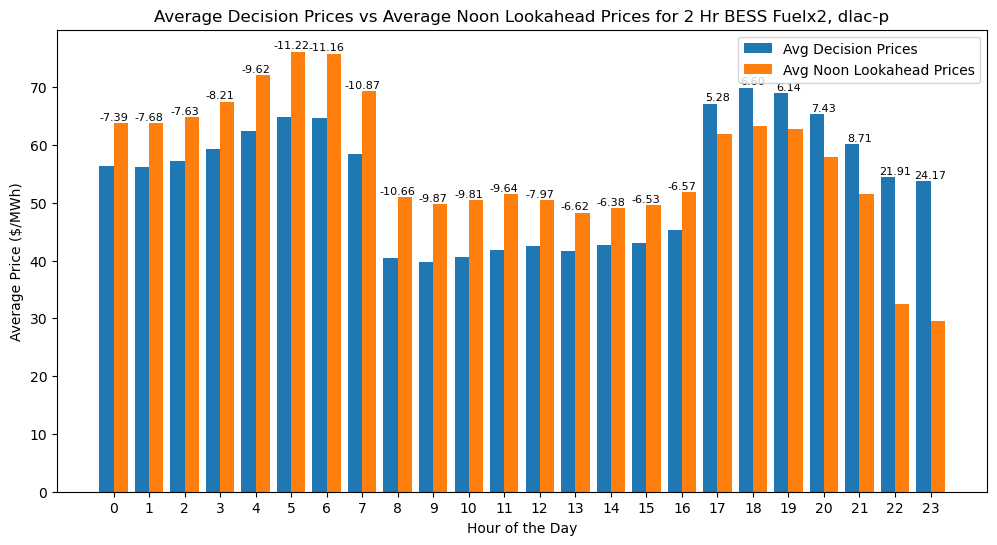

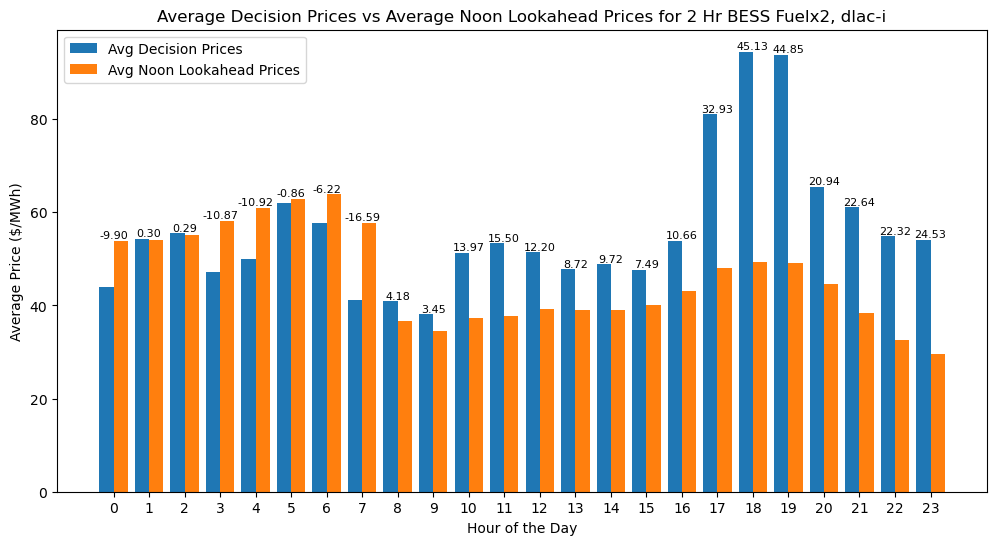

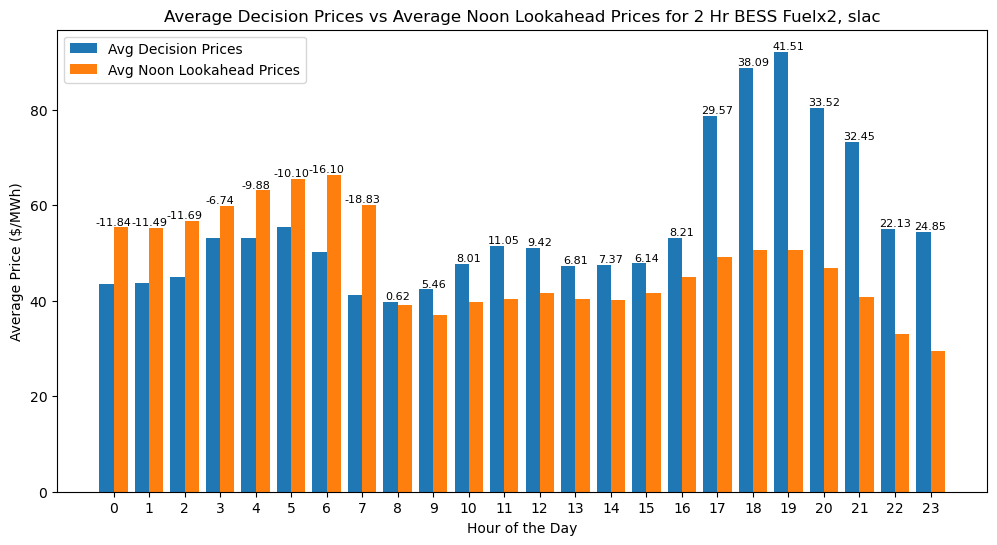

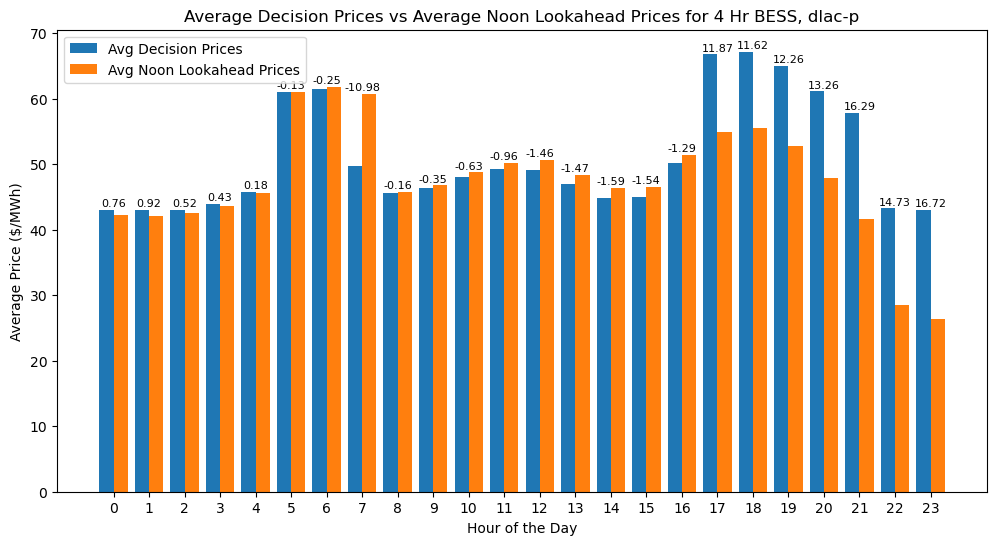

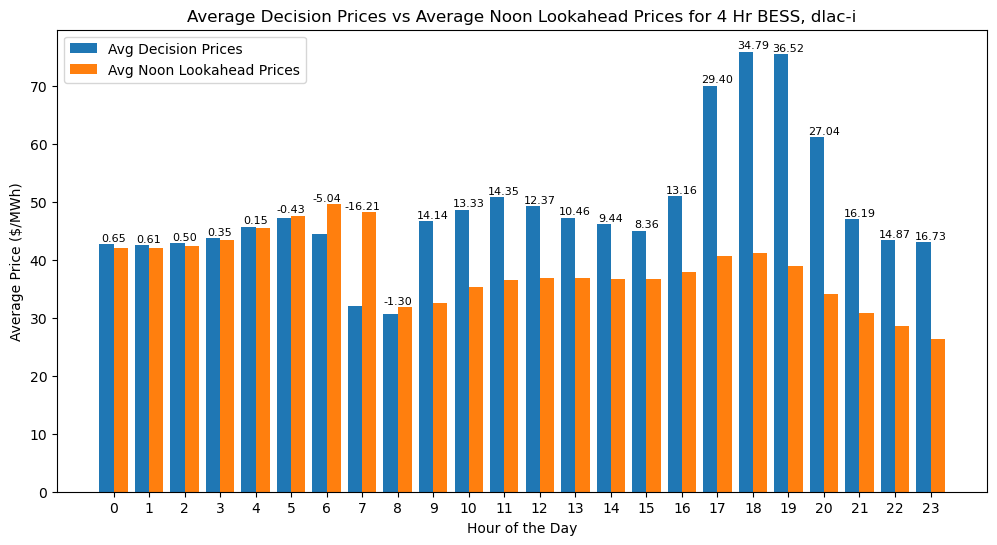

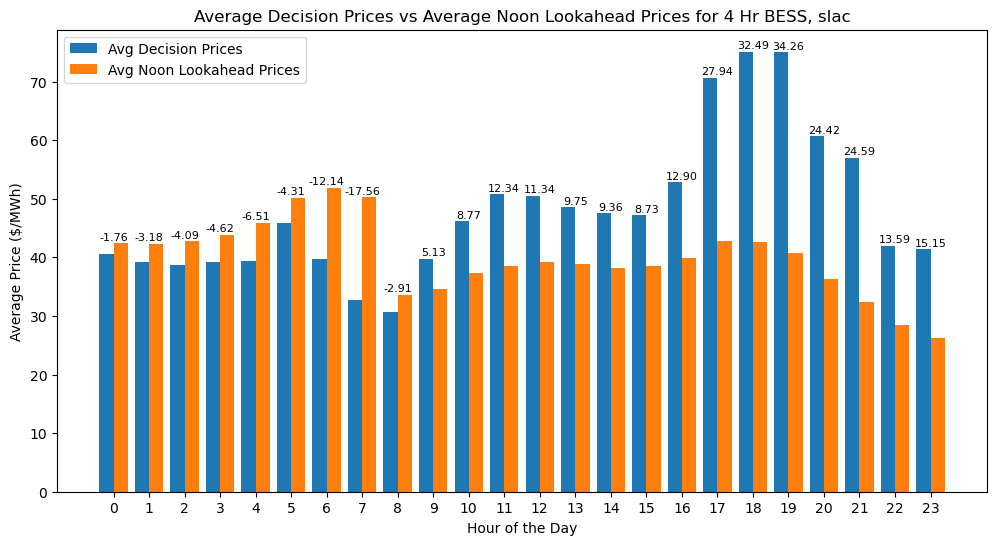

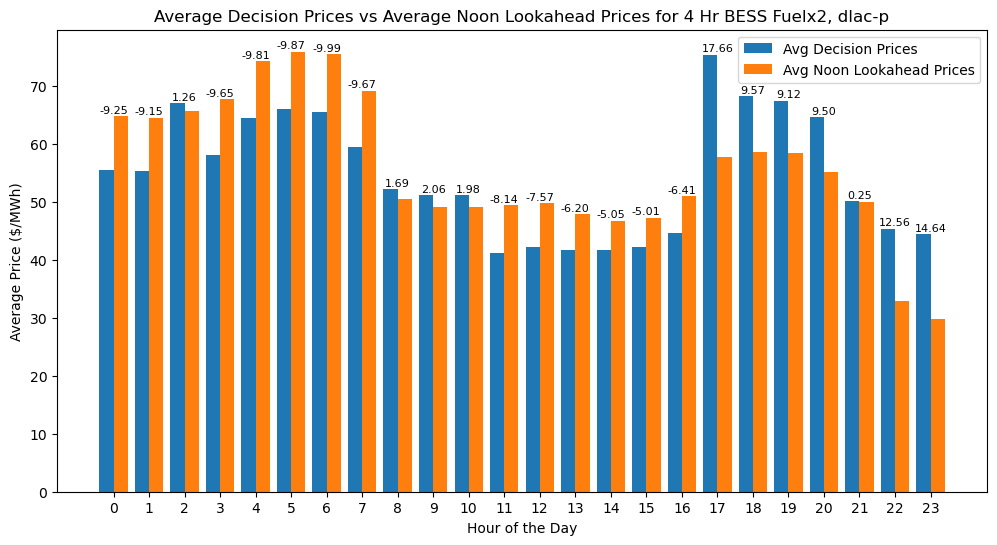

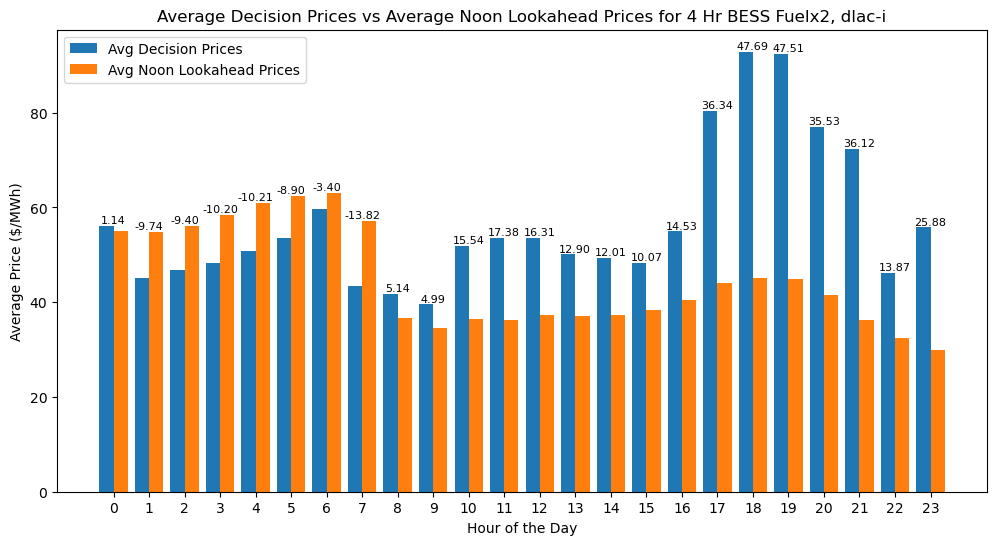

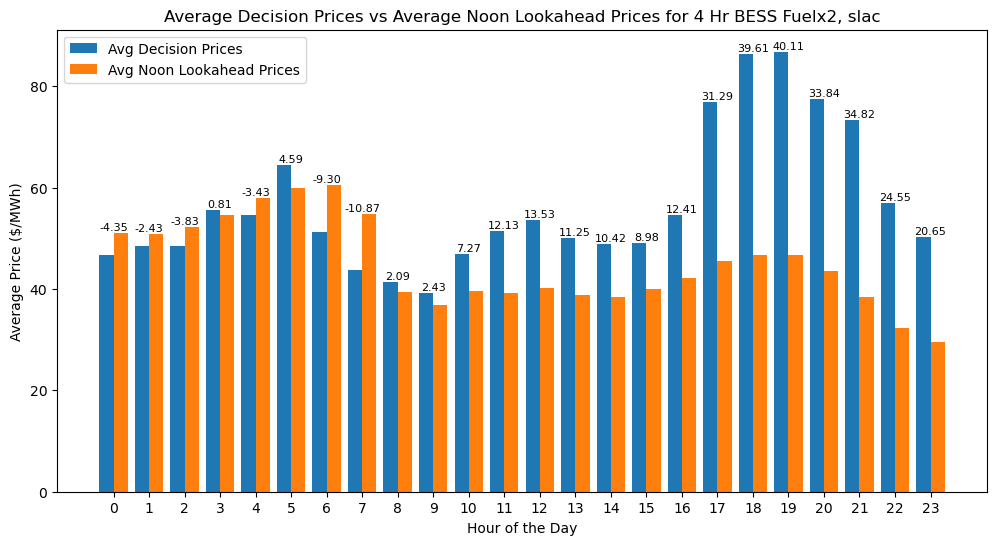

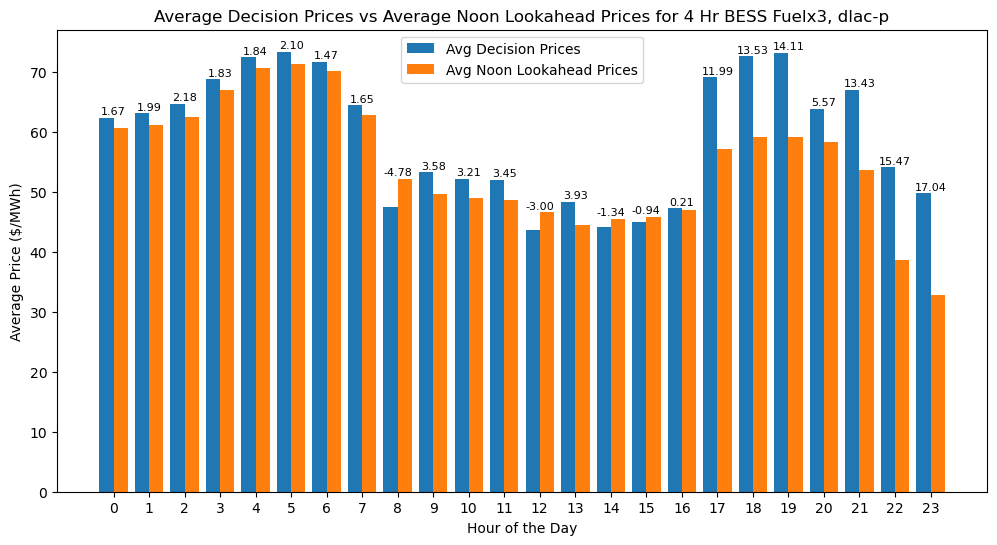

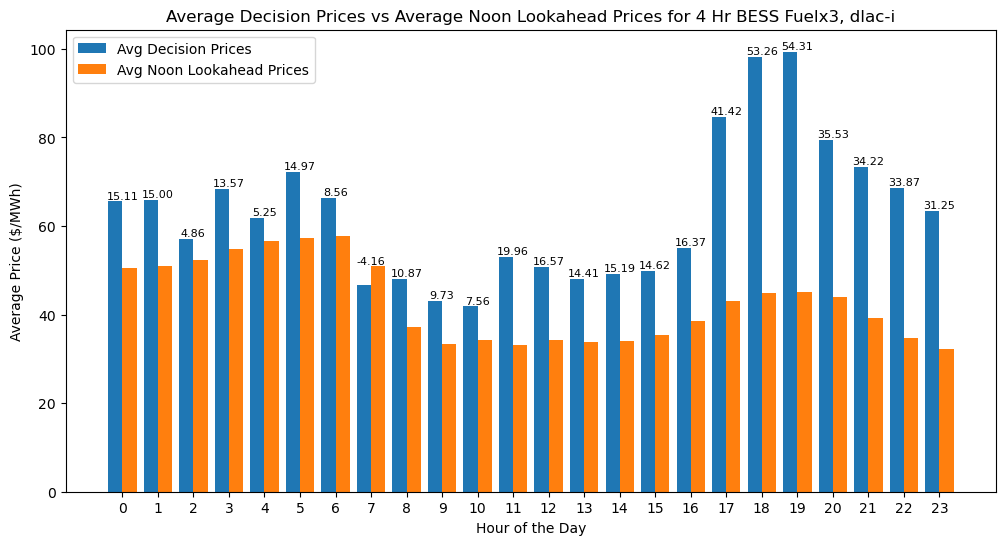

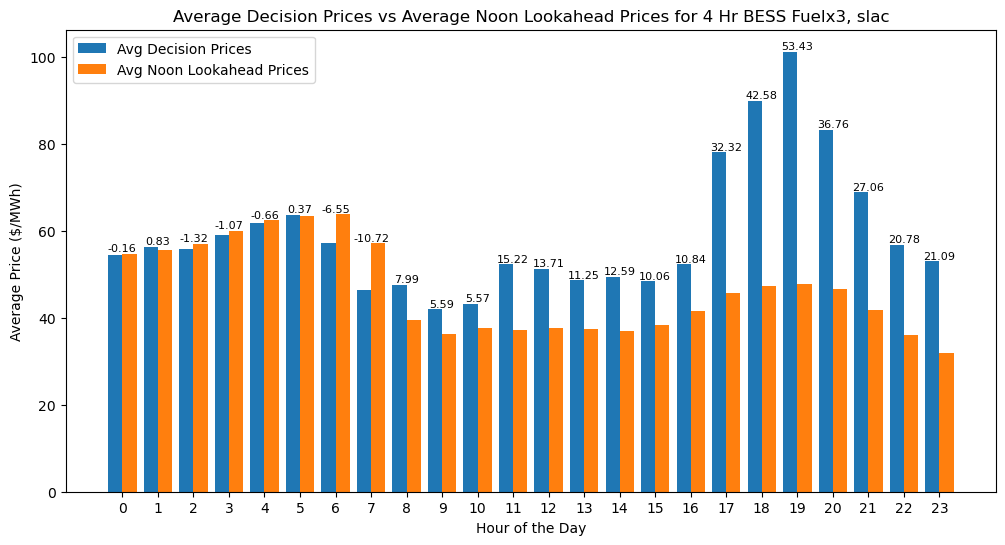

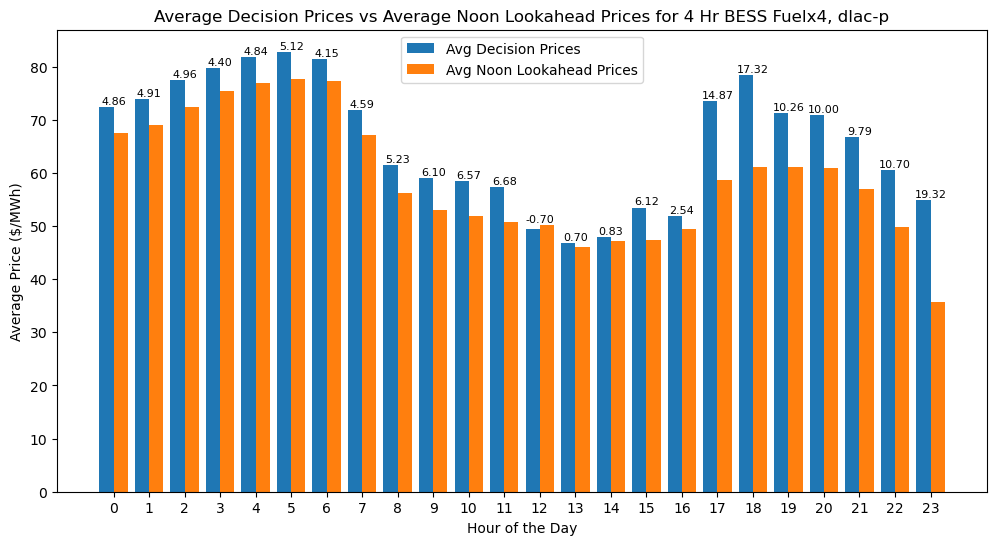

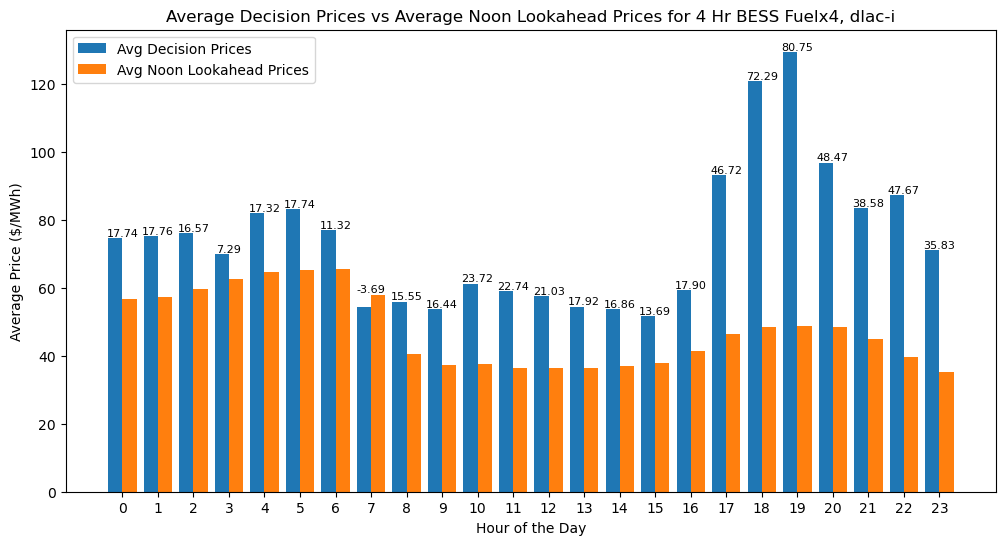

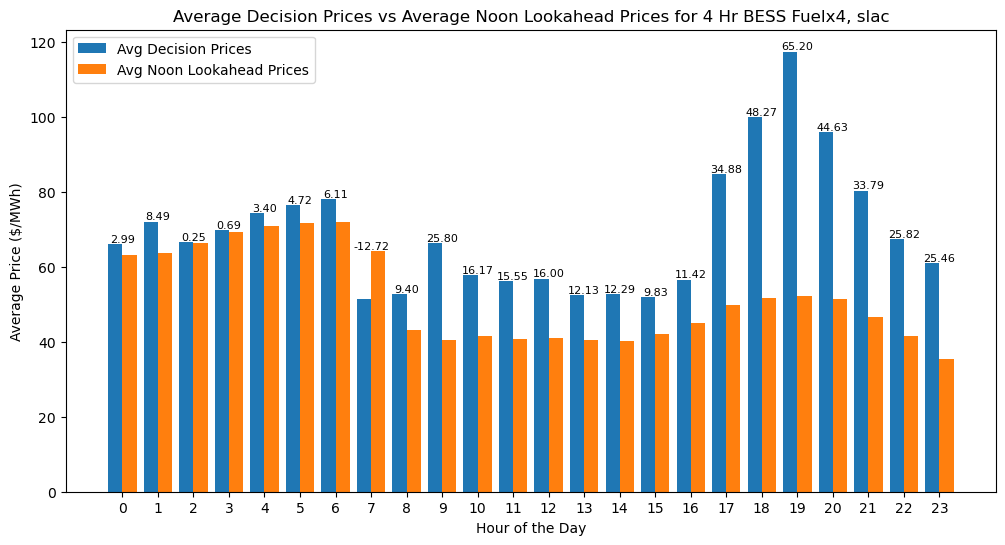

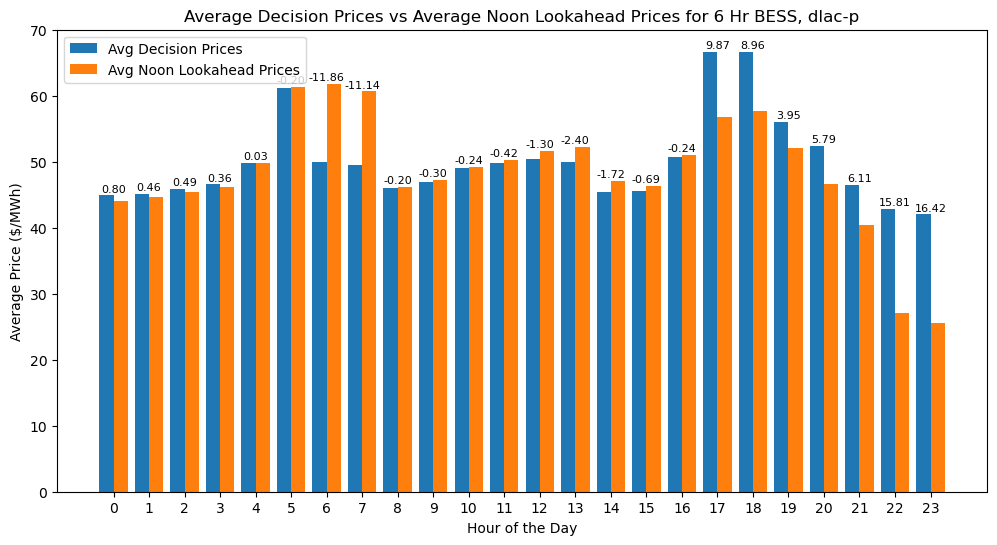

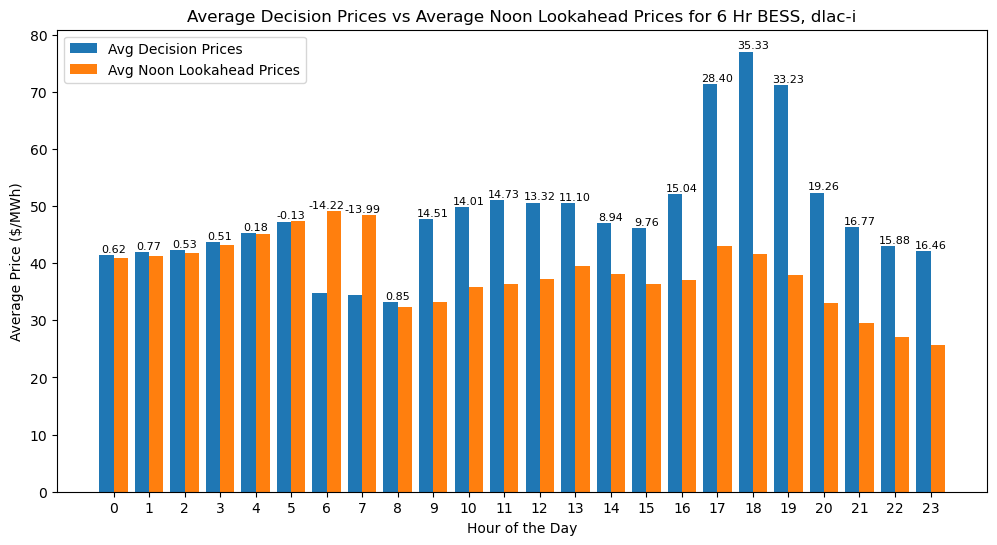

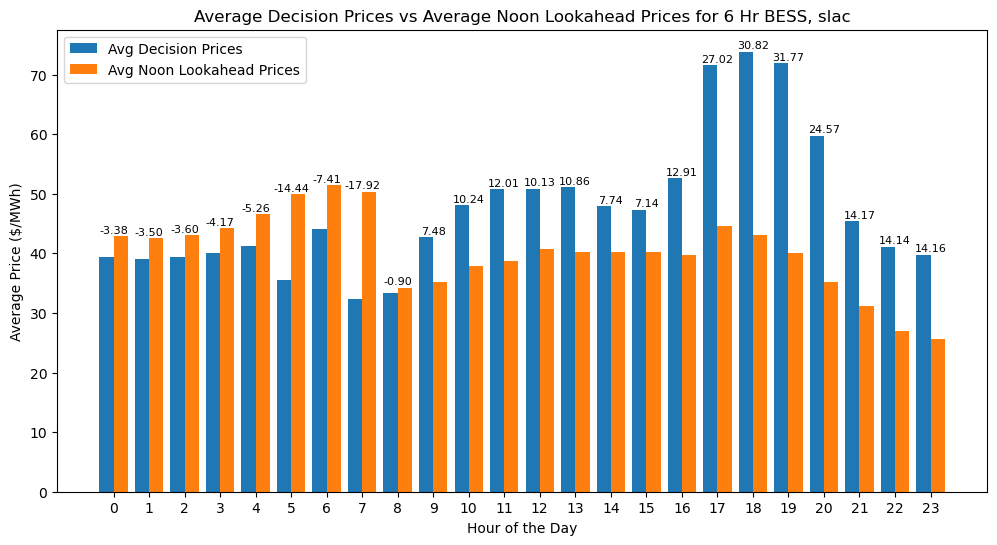

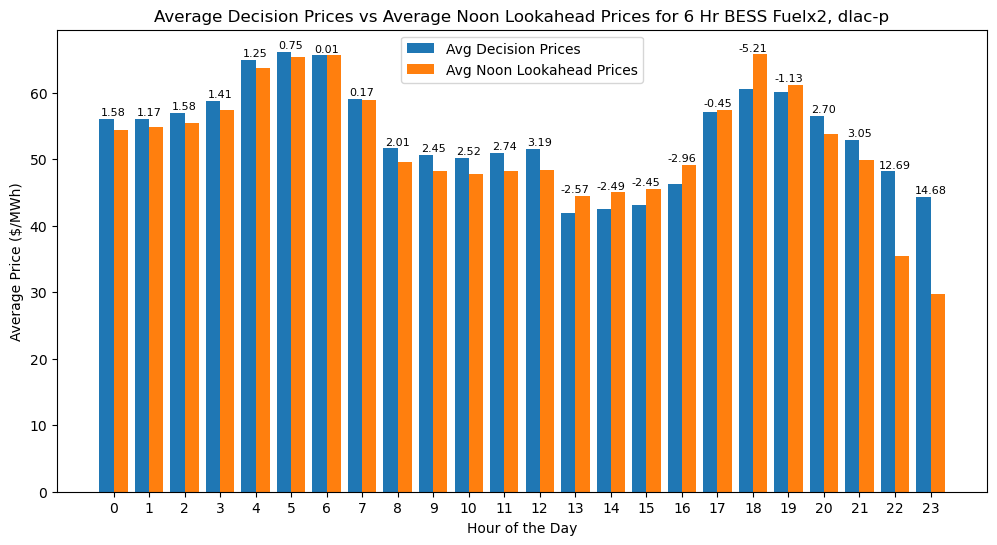

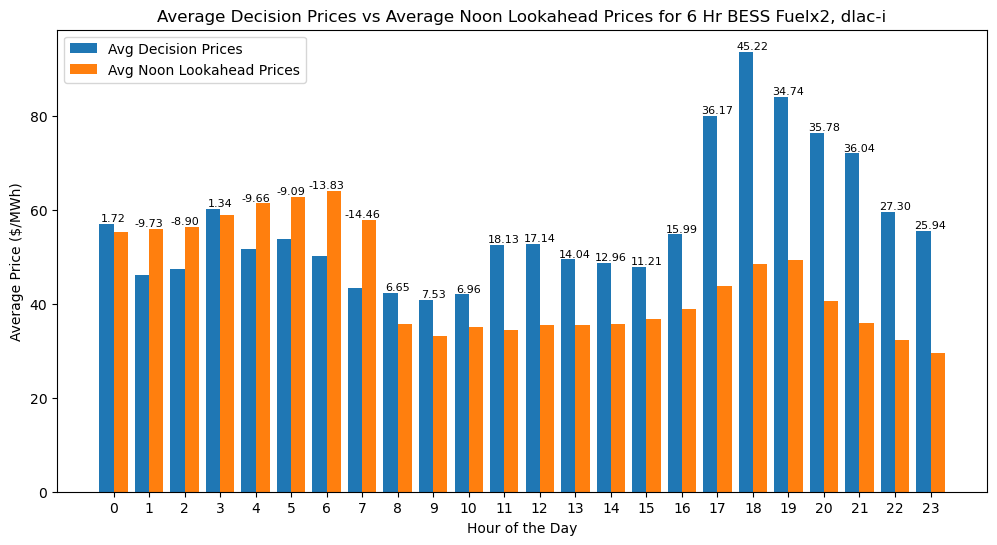

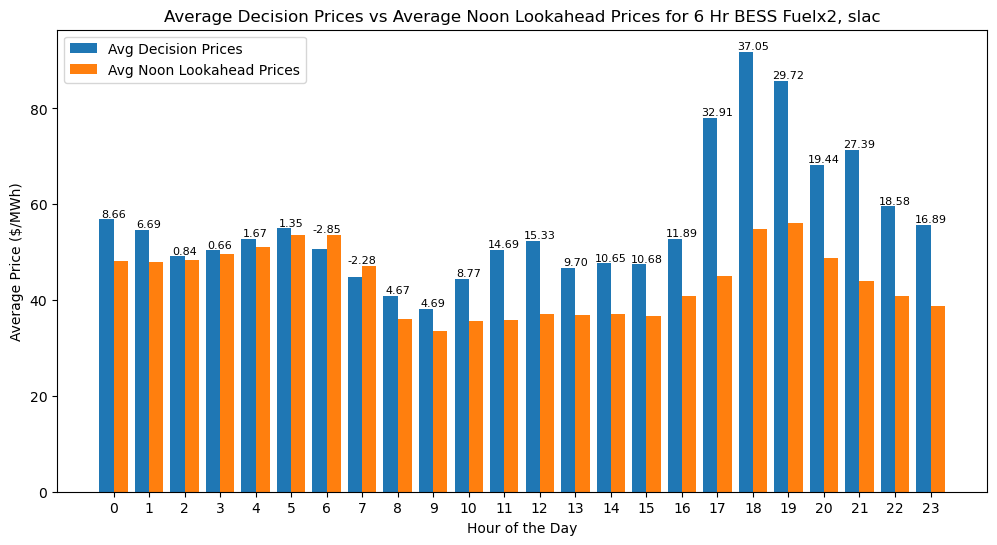

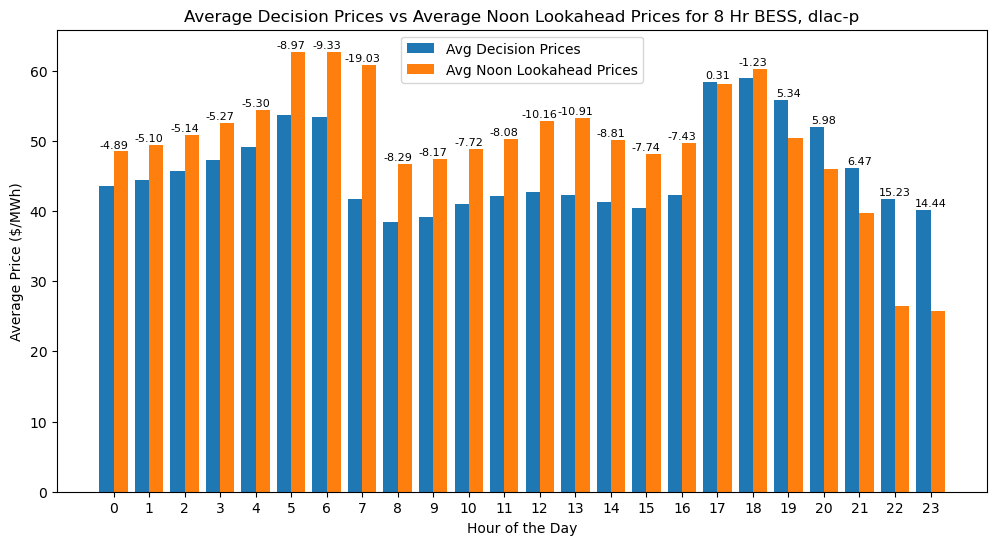

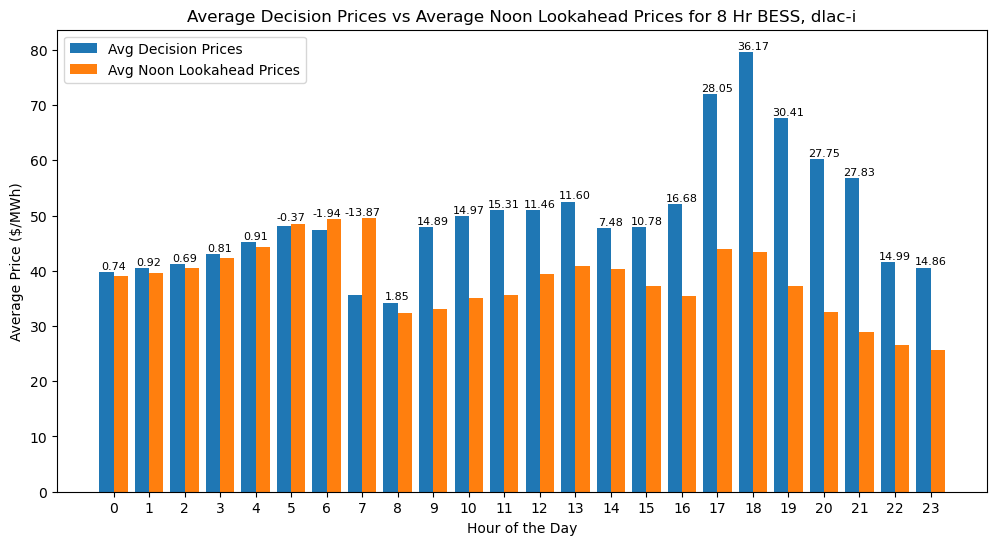

In [39]:
for case_name in case_names:

    print('Case Name: ' + case_name + '\n')


    # load generator characteristics from resources folder
    thermal_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Thermal.csv')
    vre_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Vre.csv')
    storage_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Storage.csv')

    # combine all resources to dfGen
    dfGen = pd.concat([thermal_dfGen, vre_dfGen, storage_dfGen], ignore_index=True)

    cem_prices, policies_prices_dict, prices_cols = get_case_outputs_all_models(cem_path, 
        policies_path, case_name, 'energy prices', policy_types)
    
    pf_prices = policies_prices_dict['pf']
    dlac_prices = policies_prices_dict['dlac-p']
    dlac_imperfect_prices = policies_prices_dict['dlac-i']
    slac_prices = policies_prices_dict['slac']
    
    # for model in model_names[0:1]:
    for model in policy_types:

        case_model = case_name + '_' + model

        if model == 'pf':
            decision_prices = pf_prices
            results_path = policies_path + '\\' + case_name + '\\' + 'results_' + model + '\\'
            selected_path = results_path + 'prices_scen_array.h5'
            continue
        elif model == 'dlac-p':
            decision_prices = dlac_prices
            results_path = policies_path + '\\' + case_name + '\\' + 'results_' + model + '\\'
            selected_path = results_path + 'prices_scen_array.h5'
        elif model == 'dlac-i':
            decision_prices = dlac_imperfect_prices
            results_path = policies_path + '\\' + case_name + '\\' + 'results_' + model + '\\'
            selected_path = results_path + 'prices_scen_array.h5'
        elif model == 'slac':
            decision_prices = slac_prices
            results_path = policies_path + '\\' + case_name + '\\' + 'results_' + model + '\\'
            selected_path = results_path + 'prices_scen_array.h5'
        else:
            print('Model not recognized')

        print(selected_path)
        
        hdf_dictionary = {}
        prices_scen_arrays = {}
        with h5py.File(selected_path, 'r') as hdf_file:
            for i in range(1,8687):
                dataset_name = 'prices_scen_array_' + str(i)
                if dataset_name in hdf_file:
                    hdf_dictionary[i] = hdf_file[dataset_name][:] # [()] to get the values
                    if model == 'DLAC' or model == 'DLAC_imperfect':
                        prices_scen_arrays[i] = hdf_dictionary[i].flatten()
                    else: # SLAC
                        hdf_dictionary[i] = hdf_dictionary[i]
                        prices_scen_arrays[i] = hdf_dictionary[i].sum(axis=0).flatten()
                else:
                    print(f"Dataset {dataset_name} not found in {selected_path}")


        ### 
        # add a DateTime column
        decision_prices = decision_prices.reset_index(drop=True)
        decision_prices['DateTime'] = pd.to_datetime(decision_prices.index, unit='h', origin=start_date)
        # decision_prices.set_index('DateTime', inplace=True)
        # decision_prices.columns = ['prices']
        decision_prices.columns = ['prices', 'DateTime']

        ### calculate daily average prices
        # resample to 'D' daily and calculate mean
        daily_avg_prices = decision_prices.set_index('DateTime').resample('D').mean()

        # use ranges_array to extract the prices at those ranges in prices_scen_array
        
        # initialize a dataframe for the day-ahead prices
        day_ahead_prices = pd.DataFrame(np.nan, index=range(1, 8687), columns=range(25, 49))
        current_day_prices = pd.DataFrame(np.nan, index=range(1, 8687), columns=range(1, 25))
        # Create a new DataFrame to store the datetime values
        day_ahead_prices_datetime = pd.DataFrame(index=day_ahead_prices.index, columns=day_ahead_prices.columns)
                                                 
        for i in range(8686):
            # print(i)
            day_ahead_prices.iloc[i,:] = prices_scen_arrays[i+1][DA_ranges_array[i]]
            current_day_prices.iloc[i,AD_ranges_array[i]] = prices_scen_arrays[i+1][AD_ranges_array[i]]

            start_datetime = index_to_datetime[i]
            for col in day_ahead_prices.columns:
                # column integer - model index mod 24
                hour_offset = int(col) - i%24 -1 # not -1, because inclusive of start hour datetime, and python index....
                day_ahead_prices_datetime.at[i, col] = start_datetime + datetime.timedelta(hours=hour_offset)

        ### update data
        # convert day ahead price indices to python indices base 0
        day_ahead_prices.reset_index(drop=True, inplace=True)
        current_day_prices.reset_index(drop=True, inplace=True)
        
        ### 
        hourly_average_prices = day_ahead_prices.mean(axis=0)

        # get lookahead model prices taken at noon times
        noon_lookahead_prices = day_ahead_prices.iloc[indices_at_noon, :]
        noon_lookahead_datetime_df = day_ahead_prices_datetime.iloc[indices_at_noon]

        noon_lookahead_datetime_col = noon_lookahead_datetime_df.stack().reset_index(drop=True)
        noon_lookahead_prices_col = noon_lookahead_prices.stack().reset_index(drop=True)

        # combine prices and datetimes of lookahead into a single dataframe
        noon_lookahead_df = pd.concat([noon_lookahead_datetime_col, noon_lookahead_prices_col], axis=1)
        noon_lookahead_df.columns = ['DateTime', 'Price']

        ### join decision prices with noon lookahead prices and label the prices accordingly
        # Join decision prices with noon lookahead prices
        corr_decision_lookahead_df = pd.concat([decision_prices.set_index('DateTime'), noon_lookahead_df.set_index('DateTime')], axis=1, keys=['Decision Prices', 'Noon Lookahead Prices'])

        # Flatten the MultiIndex columns
        corr_decision_lookahead_df.columns = ['_'.join(col).strip() for col in corr_decision_lookahead_df.columns.values]

        # Rename columns for clarity
        corr_decision_lookahead_df.rename(columns={'Decision Prices_prices': 'Decision Prices', 'Noon Lookahead Prices_Price': 'Noon Lookahead Prices'}, inplace=True)

        # Remove all rows with NaN values
        corr_decision_lookahead_df.dropna(inplace=True)

        # add index to the dataframe
        corr_decision_lookahead_df.reset_index(inplace=True)

        # add a column for the difference
        corr_decision_lookahead_df['Dec_minus_Look_price'] = corr_decision_lookahead_df['Decision Prices'] - corr_decision_lookahead_df['Noon Lookahead Prices']

        # print corr_decision_lookahead_df to csv file
        corr_decision_lookahead_df.to_csv(os.path.join(lookahead_avg_prices_path, f'average_prices_comparison_{case_model}.csv'), index=False)

        # Initialize dictionaries to store the averages for each hour
        avg_decision_prices = {}
        avg_noon_lookahead_prices = {}
        avg_dec_minus_look_price = {}

        # Iterate over each hour in the day (0 to 23)
        for hour in range(24):
            # Filter the dataframe for rows where the index modulus 24 is equal to the current hour
            hourly_data = corr_decision_lookahead_df[corr_decision_lookahead_df.index % 24 == hour]
            
            # Calculate the averages for the current hour
            avg_decision_prices[hour] = hourly_data['Decision Prices'].mean()
            avg_noon_lookahead_prices[hour] = hourly_data['Noon Lookahead Prices'].mean()
            avg_dec_minus_look_price[hour] = hourly_data['Dec_minus_Look_price'].mean()

        # Convert the dictionaries to DataFrames for better readability
        avg_prices_df = pd.DataFrame({
            'Hour': list(avg_decision_prices.keys()),
            'Avg Decision Prices': list(avg_decision_prices.values()),
            'Avg Noon Lookahead Prices': list(avg_noon_lookahead_prices.values()),
            'Avg Dec_minus_Look_price': list(avg_dec_minus_look_price.values())
        })

        # sum up avg_dec_minus_look_price
        total_dec_minus_look_price = sum(avg_dec_minus_look_price.values())
        # save the total_dec_minus_look_price to cases_policies_df
        cases_policies_df.at[case_name, model] = total_dec_minus_look_price


        # plot the Average Decision Prices, Noon Lookahead Prices, and the Difference
        # Plot the average Decision Prices and Noon Lookahead Prices as a bar chart
        plt.figure(figsize=(12, 6))

        # Plot Average Decision Prices
        plt.bar(avg_prices_df['Hour'] - 0.2, avg_prices_df['Avg Decision Prices'], width=0.4, label='Avg Decision Prices')


        # print(avg_prices_df['Avg Noon Lookahead Prices'])
        # Plot Average Noon Lookahead Prices
        plt.bar(avg_prices_df['Hour'] + 0.2, avg_prices_df['Avg Noon Lookahead Prices'], width=0.4, label='Avg Noon Lookahead Prices')

        # Add text of the difference between the two plots at each hour
        for i in range(len(avg_prices_df)):
            diff = avg_prices_df['Avg Dec_minus_Look_price'][i]
            plt.text(avg_prices_df['Hour'][i], max(avg_prices_df['Avg Decision Prices'][i], avg_prices_df['Avg Noon Lookahead Prices'][i]) + 0.5, f'{diff:.2f}', ha='center', fontsize=8)

        plt.xlabel('Hour of the Day')
        plt.ylabel('Average Price ($/MWh)')

        case_print = case_name.replace('_', ' ')
        plt.title(f'Average Decision Prices vs Average Noon Lookahead Prices for {case_print}, {model}')
        plt.legend()

        # Show all x-axis labels
        plt.xticks(ticks=avg_prices_df['Hour'], labels=avg_prices_df['Hour'], rotation=0)

        
        # Save the plot as a JPG file
        plt.savefig(os.path.join(lookahead_avg_prices_path, f'average_prices_comparison_{case_model}.jpg'), format='jpg')

    
# end of loop

In [ ]:
# print to latex file
cases_policies_df.to_latex(os.path.join(latex_path, 'table3_total_price_differences_RTvDA.tex'), index=True, float_format="%.2f", escape=False)
# print to csv file
cases_policies_df.to_csv(os.path.join(csv_path, 'table3_total_price_differences_RTvDA.csv'), index=True, float_format="%.2f")